# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

#%load_ext pycodestyle_magic


# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [2]:
# %%pycodestyle
from scipy.spatial.distance import cdist


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.init = init
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        x = np.array(X)
        if (self.init == "k-means"):
            self.kmeans_plus(x)
        else:
            self.random_init(x)
        new_centroids = np.copy(self.centroids)
        for cur_iter in range(1, self.max_iter):
            dist = cdist(x, self.centroids, metric=self.metric)
            self.labels = np.argmin(dist, axis=1).T
            for i in range(self.k):
                index = np.nonzero(self.labels == i)[0]
                new_centroids[i] = np.sum(x[index], axis=0) / len(index)
            if(np.array_equal(self.centroids, new_centroids)):
                break
            else:
                self.centroids = np.copy(new_centroids)
        dist = cdist(x, self.centroids, metric=self.metric)
        self.labels = np.argmin(dist, axis=1)

    def kmeans_plus(self, X, y=None):
        self.centroids[0] = X[np.random.randint(X.shape[0])]
        for i in range(1, self.k):
            dist = cdist(X, self.centroids[:i], metric=self.metric)
            dx2 = np.min(dist, axis=1).T ** 2
            rnd = np.random.random_sample() * np.sum(dx2)
            tmp_sum = 0
            j = 0
            while(rnd > tmp_sum):
                tmp_sum += dx2[j]
                j += 1
            self.centroids[i] = X[j-1]

    def random_init(self, x):
        ind = np.arange(x.shape[0])
        np.random.shuffle(ind)
        self.centroids = x[ind[:self.k], ]

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        self.fit(X)
        return self.labels


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', Batch_size=10, eps=0.1):
        MyKmeans.__init__(self, k=k, metric=metric, max_iter=max_iter,
                          random_state=random_state, init=init)
        self.Batch_size = Batch_size
        self.eps = eps

    def fit(self, X, y=None):
        np.random.seed(self.random_state)
        self.labels = np.empty(X.shape[0])
        self.centroids = np.empty((self.k, X.shape[1]))
        x = np.array(X)
        ind = np.arange(x.shape[0])
        if (self.init == "k-means"):
            self.kmeans_plus(x)
        else:
            self.random_init(x)
        update = np.ones(self.k)
        new_centroids = np.copy(self.centroids)
        for cur_iter in range(1, self.max_iter):
            np.random.shuffle(ind)
            Batch = x[ind[:self.Batch_size], ]
            dist = cdist(Batch, self.centroids, metric=self.metric)
            self.labels = np.argmin(dist, axis=1).T
            for i in range(self.k):
                index = np.nonzero(self.labels == i)[0]
                if(len(index) != 0):
                    update[i] += 1
                    step = 1 / update[i]
                    new_centroids[i] = new_centroids[i] *\
                    (1-step) + step * np.sum(Batch[index], axis=0) / len(index)
            if(np.sum(np.abs(self.centroids - new_centroids)) < self.eps):
                break
            else:
                self.centroids = np.copy(new_centroids)
        dist = cdist(x, self.centroids, metric=self.metric)
        self.labels = np.argmin(dist, axis=1)
        return self


### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

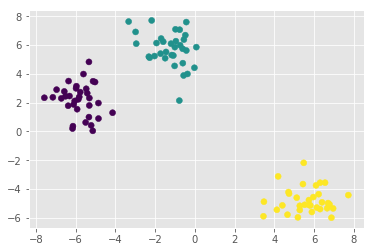

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)
plt.show()

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

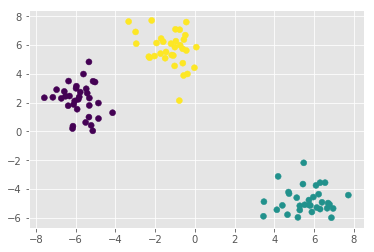

In [6]:
## Работоспособность MyKmeans
my_clust = MyKmeans(k=3)
y = my_clust.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)


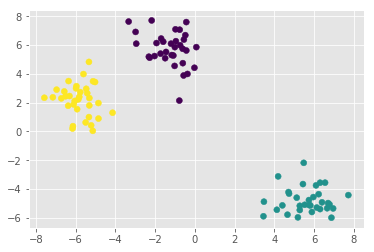

In [7]:
## Работоспособность MyKmeans++
my_clust = MyKmeans(k=3, init='k-means')
y = my_clust.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)


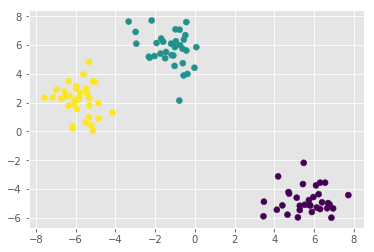

In [8]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
my_clust = MiniBatchKMeans(k=3)
y = my_clust.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)


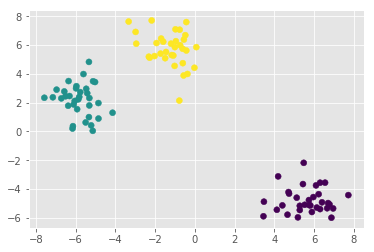

In [9]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
my_clust = MiniBatchKMeans(k = 3, init = 'k-means')
y = my_clust.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)


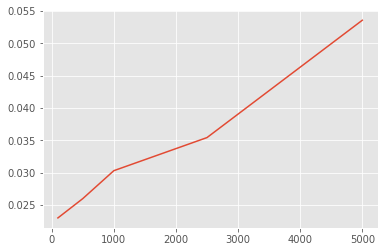

In [10]:
## Время выполнения алгоритма Kmeans из sklearn
import timeit
import functools
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
n_samples = [100, 500, 1000, 2500, 5000]
worktime = np.empty(5)
for i, n in enumerate(n_samples):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=False,
                      random_state=1234)
    worktime[i] = timeit.Timer(
                  functools.partial(model.fit_predict, X)).timeit(10) / 10

plt.plot(n_samples, worktime)
plt.show()


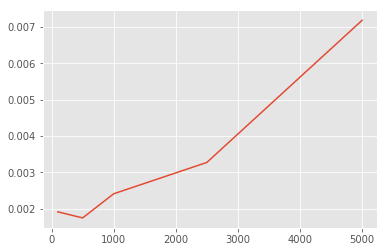

In [11]:
## Время выполнения алгоритма MyKmeans
model = MyKmeans(k=3) 
n_samples = [100, 500, 1000, 2500, 5000]
worktime = np.empty(5)
for i, n in enumerate(n_samples):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=False,
                      random_state=1234)
    worktime[i] = timeit.Timer(
                  functools.partial(model.predict, X)).timeit(10) / 10

plt.plot(n_samples, worktime)
plt.show()


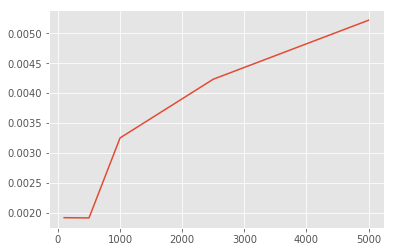

In [12]:
## Время выполнения алгоритма MyKmeans++
model = MyKmeans(k = 3, init = 'k-means')
n_samples = [100, 500, 1000, 2500, 5000]
worktime = np.empty(5)
for i, n in enumerate(n_samples):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=False,
                      random_state=1234)
    worktime[i] = timeit.Timer(
                  functools.partial(model.predict, X)).timeit(10) / 10

plt.plot(n_samples, worktime)
plt.show()


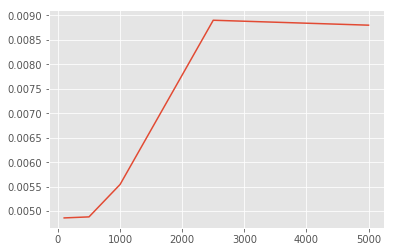

In [13]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
model = MiniBatchKMeans(k = 3)
n_samples = [100, 500, 1000, 2500, 5000]
worktime = np.empty(5)
for i, n in enumerate(n_samples):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=False,
                      random_state=1234)
    worktime[i] = timeit.Timer(
                  functools.partial(model.predict, X)).timeit(10) / 10

plt.plot(n_samples, worktime)
plt.show()


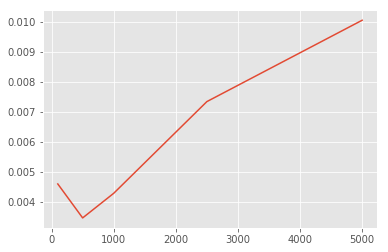

In [14]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
model = MiniBatchKMeans(k = 3, init = 'k-means' )
n_samples = [100, 500, 1000, 2500, 5000]
worktime = np.empty(5)
for i, n in enumerate(n_samples):
    X, y = make_blobs(n_samples=n, n_features=2, centers=3, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=False,
                      random_state=1234)
    worktime[i] = timeit.Timer(
                  functools.partial(model.predict, X)).timeit(10) / 10

plt.plot(n_samples, worktime)
plt.show()


# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [15]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [16]:
from sklearn.preprocessing import StandardScaler
df_data = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
scaler = StandardScaler()
data = df_data.values
X = scaler.fit_transform(data)
df_data.head()


/home/alex/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [17]:
## MyKMeans

def print_res(centr, y, arr, n_clust):
    size = np.bincount(y)
    for i in range(n_clust):
        print "size = %d" % size[i]
        res = pd.DataFrame(data=centr[i], index=arr)
        res = res.sort_values(by=0, ascending=False)
        print res.head(6)
        print('--')

my_clust = MyKmeans(k=9)
%time y = my_clust.predict(X)
arr = df_data.columns
print_res(my_clust.centroids, y, arr, 9)


CPU times: user 868 ms, sys: 8 ms, total: 876 ms
Wall time: 881 ms
size = 855
                    0
hollister    4.108934
abercrombie  3.946400
shopping     0.789844
mall         0.600057
clothes      0.554398
hot          0.409501
--
size = 19628
               0
blonde -0.029427
tennis -0.039735
jesus  -0.075554
soccer -0.080012
bible  -0.081841
death  -0.088784
--
size = 1196
               0
drugs   2.290991
drunk   2.042111
kissed  1.611360
hair    1.530391
die     1.436342
sex     0.988740
--
size = 583
                 0
marching  5.265726
band      4.152349
music     0.517510
rock      0.140811
football  0.065438
god       0.064782
--
size = 550
              0
sexy   5.150729
cute   0.540232
hot    0.426410
sex    0.278080
hair   0.275869
dance  0.211381
--
size = 2366
                   0
basketball  1.391081
baseball    1.284632
football    1.254195
softball    1.221404
volleyball  1.123024
sports      1.099843
--
size = 200
               0
kissed  6.247038
sex     4.695746

In [18]:
## MyKMeans++

my_clust = MyKmeans(k=9, init='k-means')
%time y = my_clust.predict(X)
arr = df_data.columns
print_res(my_clust.centroids, y, arr, 9)


CPU times: user 1.39 s, sys: 4 ms, total: 1.39 s
Wall time: 1.4 s
size = 3993
                 0
shopping  0.853075
church    0.767838
cute      0.697481
mall      0.624645
clothes   0.547387
god       0.546864
--
size = 578
                 0
marching  5.324553
band      4.130274
music     0.502217
rock      0.144951
god       0.064475
football  0.054381
--
size = 712
               0
kissed  3.994351
hair    2.921884
drugs   2.837199
sex     2.580138
die     1.792251
rock    1.576817
--
size = 637
                     0
cheerleading  5.494322
shopping      0.498753
football      0.358966
cute          0.251071
hot           0.230516
mall          0.221254
--
size = 18848
               0
blonde -0.030313
tennis -0.053375
bible  -0.081951
soccer -0.084668
death  -0.098398
jesus  -0.099530
--
size = 889
                 0
dance     4.027075
dress     0.458902
cute      0.326584
music     0.270418
shopping  0.265823
hair      0.226765
--
size = 1316
              0
drunk  3.345591
drugs

In [19]:
## MyKMeans с MiniBatchMyKMeans

batch_size = len(X) // 10

my_clust = MiniBatchKMeans(k=9, Batch_size=batch_size, eps = 1)
%time y = my_clust.predict(X)
arr = df_data.columns
print_res(my_clust.centroids, y, arr, 9)


CPU times: user 140 ms, sys: 4 ms, total: 144 ms
Wall time: 145 ms
size = 946
                   0
softball    2.958213
volleyball  2.683165
dress       2.210938
basketball  0.499542
shopping    0.371899
football    0.335734
--
size = 422
                 0
tennis    6.187999
death     0.373727
mall      0.189510
church    0.160740
football  0.140473
sports    0.136066
--
size = 2107
                   0
football    1.637349
sports      1.635278
baseball    0.981212
basketball  0.805945
die         0.537731
soccer      0.228752
--
size = 2499
                     0
hot           1.683148
shopping      1.346665
mall          1.069571
cute          0.561699
clothes       0.502221
cheerleading  0.466935
--
size = 18031
               0
blonde -0.029207
bible  -0.059877
jesus  -0.081258
sexy   -0.088734
soccer -0.091853
drunk  -0.092940
--
size = 935
               0
kissed  3.247805
hair    2.705039
drugs   2.502730
sex     2.177285
drunk   1.616756
sexy    1.435854
--
size = 3017
       

In [20]:
## MyKMeans++ с MiniBatchMyKMeans

my_clust = MiniBatchKMeans(k=9, init='k-means', Batch_size=batch_size, eps = 1)
%time y = my_clust.predict(X)
arr = df_data.columns
print_res(my_clust.centroids, y, arr, 9)


CPU times: user 384 ms, sys: 4 ms, total: 388 ms
Wall time: 385 ms
size = 242
                   0
tennis      9.154896
sports      0.279790
basketball  0.246995
shopping    0.210409
swimming    0.175591
band        0.171035
--
size = 665
                     0
cheerleading  5.390880
shopping      0.459719
abercrombie   0.370603
football      0.360832
hollister     0.331347
softball      0.205616
--
size = 20002
                 0
marching -0.012287
blonde   -0.028071
band     -0.057992
bible    -0.061524
jesus    -0.073147
death    -0.075504
--
size = 1974
                 0
dress     1.976029
church    1.300986
shopping  0.858703
god       0.832134
jesus     0.787840
dance     0.719810
--
size = 664
                  0
hot        5.096561
cute       1.710537
sexy       1.008272
hair       0.597274
clothes    0.567256
hollister  0.453792
--
size = 38
                0
sex     10.244816
hair     8.824525
kissed   7.988006
drugs    6.244929
sports   5.212930
die      5.061508
--
size = 

In [21]:
## Вывод
# На реальных данных лучший результат по времени работы показывает MiniBatchMyKMeans
#(так как работает на каждой итерации лишь с частью данных)
#Однако минусом этой модификации является появление 2 новых параметров - размера партии и эпсилон 
#также результат работы модификации хуже, чем KMeans
